In [1]:
#Importing the required Libraries
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#Loading the dataset
diabetes_dataset=pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
#Getting the number of rows and columns
diabetes_dataset.shape

(100000, 9)

CHECKING THE DATASET

In [6]:
#Printing and checking the first five values
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
#Checking for the null values
diabetes_dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
#The models are not able to understand the catagorical data as we've in gender and smoking_history columns. 
#So replacing these catagorical values into numerical values
diabetes_dataset=diabetes_dataset.replace({'gender':{'Male':0,'Female':1,'Other':2},
                         'smoking_history':{'never':0,'current':1,'ever':2,'former':3,'not current':4,'No Info':5}})
diabetes_dataset.head()

/var/folders/g9/p38933tx07z8b5zkk1qf7hg00000gn/T/ipykernel_8008/2898240168.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_dataset=diabetes_dataset.replace({'gender':{'Male':0,'Female':1,'Other':2},


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,5,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,1,23.45,5.0,155,0
4,0,76.0,1,1,1,20.14,4.8,155,0


In [9]:
#checking for the frequencies of the results to check Whether the dataset is biased or unbiased
diabetes_dataset['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
#importing matplotlib for data visualisation
import matplotlib.pyplot as plt

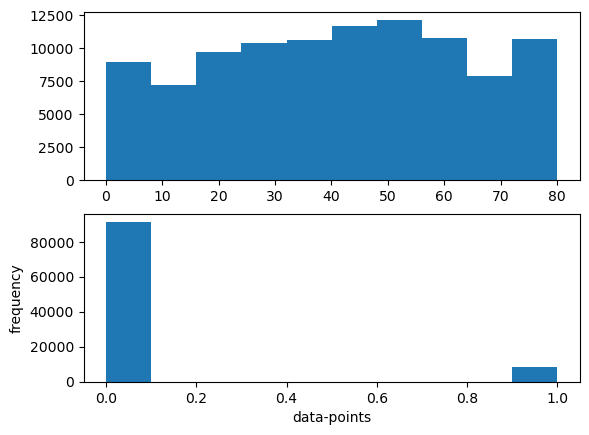

In [11]:
#creating figures for multiple plots
new_fig=plt.figure()
#adding axis to figures
axes1=new_fig.add_subplot(2,1,1)
axes2=new_fig.add_subplot(2,1,2)
#specifying the plots
axes1.hist(diabetes_dataset['age'])
axes2.hist(diabetes_dataset['diabetes'])
plt.xlabel("data-points")
plt.ylabel("frequency")
plt.show()

In [12]:
# Because our original dataset is highly biased, so creating a new dataset the contains equal proportion of 0's and 1's
# DataSet that contains the data of diabetic patients
temp_dataset1=diabetes_dataset.loc[diabetes_dataset['diabetes']==1]
#similarly another dataSet that contains the data about non-disbetic patients
temp_dataset2=diabetes_dataset.loc[diabetes_dataset['diabetes']==0]

In [13]:
#checking the initial values of the diabetic patients
temp_dataset1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,1,44.0,0,0,0,19.31,6.5,200,1
26,0,67.0,0,1,4,27.32,6.5,200,1
38,0,50.0,1,0,1,27.32,5.7,260,1
40,0,73.0,0,0,3,25.91,9.0,160,1
53,1,53.0,0,0,3,27.32,7.0,159,1


In [14]:
#checking the initial five values of the non_diabetic patients
temp_dataset2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,5,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,1,23.45,5.0,155,0
4,0,76.0,1,1,1,20.14,4.8,155,0


In [15]:
#now collecting equal proportions of data from non_diabetic dataset.
temp_dataset2=temp_dataset2.sample(n=len(temp_dataset1))
temp_dataset2.shape

(8500, 9)

In [16]:
#concatenating both the temporary datsets to create a equally distributed dataset
new_diabetes_dataset=pd.concat([temp_dataset1,temp_dataset2],axis=0)
#checking the values of the new dataset
new_diabetes_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,1,44.0,0,0,0,19.31,6.5,200,1
26,0,67.0,0,1,4,27.32,6.5,200,1
38,0,50.0,1,0,1,27.32,5.7,260,1
40,0,73.0,0,0,3,25.91,9.0,160,1
53,1,53.0,0,0,3,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
59230,1,61.0,0,0,5,27.32,6.6,80,0
84875,0,45.0,0,0,0,27.32,5.8,80,0
41285,1,6.0,0,0,0,23.52,4.8,126,0
79665,0,43.0,0,0,2,39.60,5.0,100,0


In [17]:
# Spliting our data into dependent and independent variables
X=new_diabetes_dataset.drop("diabetes",axis=1)
y=new_diabetes_dataset['diabetes']

In [18]:
# Overviewing the initial values of the independent dataset
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
6,1,44.0,0,0,0,19.31,6.5,200
26,0,67.0,0,1,4,27.32,6.5,200
38,0,50.0,1,0,1,27.32,5.7,260
40,0,73.0,0,0,3,25.91,9.0,160
53,1,53.0,0,0,3,27.32,7.0,159


In [19]:
#overviewing the initial dataset of the dependent dataset
y.head()

6     1
26    1
38    1
40    1
53    1
Name: diabetes, dtype: int64

In [20]:
#dividing our dataset into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=4)

In [21]:
print(X_train.shape,y_train.shape)

(13600, 8) (13600,)


CREATING THE KNN-MODEL FOR MAKING PREDICTION

In [23]:
#predicting the output through KNN model
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#creating the knn model for prediction
knn_model = KNeighborsClassifier()

In [25]:
#training the model with x and y train data
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
#making prediction and knowing the accuracy score
y_pred=knn_model.predict(X_test)
print("Accuracy of KNN model = ",accuracy_score(y_pred,y_test)*100,"%")

Accuracy of KNN model =  85.82352941176471 %


In [27]:
#knowing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1688
           1       0.86      0.86      0.86      1712

    accuracy                           0.86      3400
   macro avg       0.86      0.86      0.86      3400
weighted avg       0.86      0.86      0.86      3400



CREATING THE MODEL OF DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
#creating the object of decision tree
decisionTree_model = DecisionTreeClassifier()

In [31]:
#training the model with the training and testing data
decisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
#making the prediction using the suppost vector machine classifier
y_pred=decisionTree_model.predict(X_test)
print("accuarcy of decision tree model = ",accuracy_score(y_pred,y_test)*100,"%")

accuarcy of decision tree model =  86.97058823529412 %


In [33]:
#knowing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1679
           1       0.88      0.87      0.87      1721

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



CREATING THE MODEL OF RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
#creating the object of Random forest
randomForest_model=RandomForestClassifier()

In [37]:
#training the created model with the train and test data
randomForest_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
#making predictions using the random forest model
y_pred=randomForest_model.predict(X_test)
print("The accuracy of the random forest model=",accuracy_score(y_test,y_pred)*100,"%")

The accuracy of the random forest model= 90.38235294117646 %


In [39]:
#since the Random Forest classifier offers us the maximun accuracy we'll consider this model
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1665
           1       0.91      0.90      0.90      1735

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [40]:
def prediction(test_data):
    result_data=randomForest_model.predict(test_data)
    return result_data[0]

CREATING THE SUPPORT VECTOR MACHINE MODEL

In [42]:
from sklearn import svm

In [43]:
#creating the model of support vector machine clasiifier
svm_model = svm.SVC(kernel='linear')

In [44]:
#training the model with the training and testing data
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
#making the prediction using the suppost vector machine classifier
y_pred=svm_model.predict(X_test)
print("accuarcy of svm model = ",accuracy_score(y_pred,y_test)*100,"%")

accuarcy of svm model =  88.08823529411765 %


In [46]:
#knowing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1677
           1       0.89      0.88      0.88      1723

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



Since, RandomForestClassifier is giving us the most significant and accurate result, We'll use this model to make prediction on user's input.

CREATING USER INPUT INTERFACE

In [49]:
gender=int(input("Enter your gender:\n0.Male\n1.Female\n2.Others\n"))
print("------------------------------------------------------------")
age=int(input("Enter your age:"))
print("------------------------------------------------------------")
hypertension=int(input("Are you suffering from hypertension:\n0.No\n1.Yes\n"))
print("------------------------------------------------------------")
heart_disease=int(input("Are you suffering from any heart Disease:\n0.No\n1.Yes\n"))
print("------------------------------------------------------------")
smoking_history=int(input("Please specify your smoking history:\n0.Never smoked\n1.Currently Smoking\n2.Occasionally \n"))
print("------------------------------------------------------------")
height=float(input("Enter your Height in meters:"))
print("------------------------------------------------------------")
weight=int(input("Enter your Weight in kilograms:"))
print("------------------------------------------------------------")
bmi=weight/(height**2)
print("Your BMI is : ",bmi)
print("------------------------------------------------------------")
HbA1c_level=float(input("Enter your HbA1c level:"))
print("------------------------------------------------------------")
blood_glucose_level=int(input("Enter your Blood Glucose Level:"))
print("------------------------------------------------------------")

Enter your gender:
0.Male
1.Female
2.Others
 0


------------------------------------------------------------


Enter your age: 23


------------------------------------------------------------


Are you suffering from hypertension:
0.No
1.Yes
 0


------------------------------------------------------------


Are you suffering from any heart Disease:
0.No
1.Yes
 0


------------------------------------------------------------


Please specify your smoking history:
0.Never smoked
1.Currently Smoking
2.Occasionally 
 2


------------------------------------------------------------


Enter your Height in meters: 1.4


------------------------------------------------------------


Enter your Weight in kilograms: 56


------------------------------------------------------------
Your BMI is :  28.571428571428577
------------------------------------------------------------


Enter your HbA1c level: 4


------------------------------------------------------------


Enter your Blood Glucose Level: 87


------------------------------------------------------------


In [50]:
data={'gender':[gender],'age':[age],
      'hypertension':[hypertension],'heart_disease':[heart_disease],
      'smoking_history':[smoking_history],'bmi':[bmi],
      'HbA1c_level':[HbA1c_level],'blood_glucose_level':[blood_glucose_level]}
temp_data=pd.DataFrame(data)
print(temp_data)

   gender  age  hypertension  heart_disease  smoking_history        bmi  \
0       0   23             0              0                2  28.571429   

   HbA1c_level  blood_glucose_level  
0          4.0                   87  


In [51]:
#the models returns the prediction in a 2-Dimensional array format
y=prediction(temp_data).reshape(-1)
if y[0]==1:
    print("You've been detected as Diabetic Patient")
else:
    print("You're not Diabetic.")

You're not Diabetic.
